<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Librarys" data-toc-modified-id="Importing-Librarys-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Librarys</a></span></li><li><span><a href="#Creating-Data-loader" data-toc-modified-id="Creating-Data-loader-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating Data loader</a></span></li></ul></div>

##  Importing Librarys

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os
from glob import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
from tensorflow.keras.utils import *
from tensorflow.keras.regularizers import *

## Creating Data loader

In [2]:
os.getcwd()

'C:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision'

In [3]:
folders = os.listdir('c:\\Users\\SHEHA\\Downloads\\GitHubRepository\\Python2022\\ComputerVision\\Dataset\\Assignment1')

In [4]:
for i,j in enumerate(folders):
    print('{j} folder is lebel {i}'.format(i=i, j=j))

n01440764 folder is lebel 0
n01443537 folder is lebel 1
n01484850 folder is lebel 2
n01491361 folder is lebel 3
n01494475 folder is lebel 4
n01496331 folder is lebel 5


In [5]:
datat = np.sort(np.array(glob('./Dataset/Assignment1/*')))    
len(datat)

6

In [6]:
def all_train_dir(datat):
    kw = list()
    kb = list()

    for j in range(len(datat)//1):
        v1 = np.sort(np.array(glob(datat[j]+'/*')))
        random.shuffle(v1)

        for i in range(len(v1)//1):

            kw.append(v1[i])
            kb.append(j)

    return np.array(kw),np.array(kb)

In [7]:
tdr1, tdr2 = all_train_dir(datat)

In [8]:
tdr1

array(['./Dataset/Assignment1\\n01440764\\n01440764_292.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_63.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_141.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_315.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_105.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_297.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_18.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_188.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_237.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_137.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_239.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_78.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_190.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_39.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_261.JPEG',
       './Dataset/Assignment1\\n01440764\\n01440764_172.JPE

In [9]:
len(tdr1)

180

In [10]:
tdr2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5])

In [11]:
print(type(tdr1))
print(type(tdr2))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
print(np.unique(tdr2))

[0 1 2 3 4 5]


In [13]:
# test code
# one hot encoding
to_categorical(tdr2, len(np.unique(tdr2))).shape

(180, 6)

In [14]:
from skimage import io

image = io.imread(tdr1[0])
type(image)

numpy.ndarray

In [15]:
image.dtype

dtype('uint8')

In [16]:
image.shape

(375, 500, 3)

0


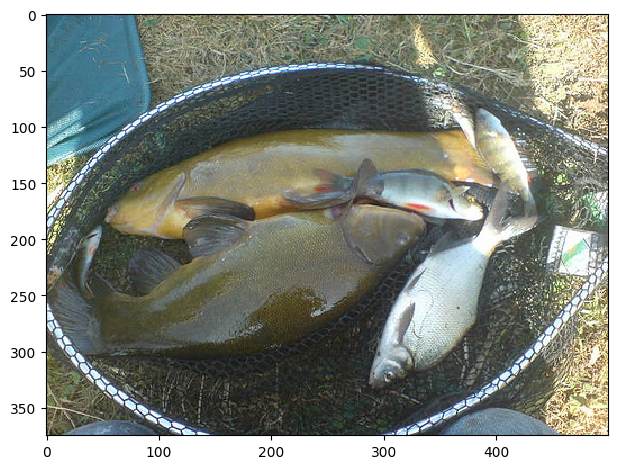

In [17]:
io.imshow(image)
print(tdr2[0])

./Dataset/Assignment1\n01484850\n01484850_351.JPEG
2


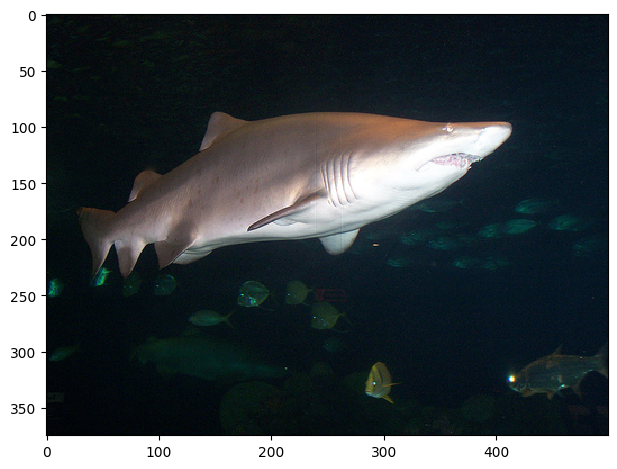

In [18]:
print(tdr1[65])
image = io.imread(tdr1[65])
io.imshow(image)
print(tdr2[65])

In [19]:
img_size = (224, 224)
batch_size = 32

def preprocess_image(filename, label):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.resize(image, img_size)
    return image, label

In [20]:
tdr2 = to_categorical(tdr2, len(np.unique(tdr2)))
tdr2

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
dataset = tf.data.Dataset.from_tensor_slices((tdr1, tdr2)).shuffle(180)

In [22]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [23]:
train_image = dataset.map(preprocess_image).batch(batch_size).prefetch(1)

In [24]:
train_image

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [25]:
b1,b2 = next(iter(train_image))

In [26]:
len(b1)

32

In [27]:
len(b2)

32

In [28]:
b1

<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
array([[[[1.60360977e+02, 1.67360977e+02, 1.84028702e+02],
         [1.62339294e+02, 1.69339294e+02, 1.87642853e+02],
         [1.65531250e+02, 1.72585464e+02, 1.91013397e+02],
         ...,
         [2.15085464e+02, 2.05514038e+02, 2.04745544e+02],
         [2.15509567e+02, 2.06387756e+02, 2.03345657e+02],
         [2.17156876e+02, 2.08153687e+02, 2.01874374e+02]],

        [[1.62863525e+02, 1.69863525e+02, 1.88777435e+02],
         [1.64233414e+02, 1.71330994e+02, 1.90330994e+02],
         [1.65416458e+02, 1.73505737e+02, 1.92180496e+02],
         ...,
         [2.13805481e+02, 2.04878830e+02, 2.06235977e+02],
         [2.16678558e+02, 2.07034424e+02, 2.05811859e+02],
         [2.19892838e+02, 2.09110321e+02, 2.06871811e+02]],

        [[1.66072708e+02, 1.73590561e+02, 1.87038269e+02],
         [1.67071426e+02, 1.74637115e+02, 1.89301651e+02],
         [1.67151154e+02, 1.75115433e+02, 1.91597580e+02],
         ...,
         [

In [29]:
b1.shape

TensorShape([32, 224, 224, 3])

In [30]:
b2

<tf.Tensor: shape=(32, 6), dtype=float32, numpy=
array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.,

In [31]:
b2.shape

TensorShape([32, 6])

In [32]:
print(np.min(b1))
print(np.max(b1))

0.0
255.0


In [33]:
for i, (x,y) in enumerate(train_image):
    print(i, x.shape, y.shape)

0 (32, 224, 224, 3) (32, 6)
1 (32, 224, 224, 3) (32, 6)
2 (32, 224, 224, 3) (32, 6)
3 (32, 224, 224, 3) (32, 6)
4 (32, 224, 224, 3) (32, 6)
5 (20, 224, 224, 3) (20, 6)


In [45]:
# all steps using function

tdr1, tdr2 = all_train_dir(datat)
img_size = (224, 224)
batch_size = 32

def preprocess_image(filename, label):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.resize(image, img_size)
    return image, label

def dataloader(imagedata, labels,):
    labels = to_categorical(labels, len(np.unique(labels)))
    
    dataset = tf.data.Dataset.from_tensor_slices((imagedata, labels)).shuffle(180)
    train_image = dataset.map(preprocess_image).batch(batch_size).prefetch(1)
    return train_image

In [46]:
newdata = dataloader(tdr1, tdr2,)

d1,d2 = next(iter(newdata))

In [47]:
d1.shape

TensorShape([32, 224, 224, 3])

In [48]:
d2.shape

TensorShape([32, 6])

In [49]:
d2

<tf.Tensor: shape=(32, 6), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.,

# new data loading

In [3]:
BASE_PATH = r"C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\Dataset\seg_image"
print("NO. test imgs ", len(glob(BASE_PATH+"\*")))

NO. test imgs  54


In [7]:
train_data_d = np.sort(np.array(glob(BASE_PATH+"\*")))
len(train_data_d) 

54

In [8]:
# test orginal dataset
test_dataset = tf.data.Dataset.from_tensor_slices((train_data_d, train_data_d))

In [9]:
# image preprocess
img_size = (256, 256)
batch_size = 54 # giving whole dataset

def preprocess_image(filename1, filename2):
    image_string1 = tf.io.read_file(filename1)
    image1 = tf.image.decode_jpeg(image_string1, channels=3)
    image1 = tf.image.resize(image1, img_size)

    image_string2 = tf.io.read_file(filename2)
    image2 = tf.image.decode_jpeg(image_string2, channels=3)
    image2 = tf.image.resize(image2, img_size)

    return image1, image2

In [10]:
t_image = test_dataset.map(preprocess_image).batch(batch_size).prefetch(1)
for i, (x, y) in enumerate(t_image):
    print(i, x.shape, y.shape)

0 (54, 256, 256, 3) (54, 256, 256, 3)


In [11]:
print(x.dtype)
print(type(x))
print(x.shape)

<dtype: 'float32'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(54, 256, 256, 3)


In [12]:
test_org_image = x
test_org_image = x/255
print(test_org_image.shape)

(54, 256, 256, 3)


Text(0.5, 1.0, 'Ground truth')

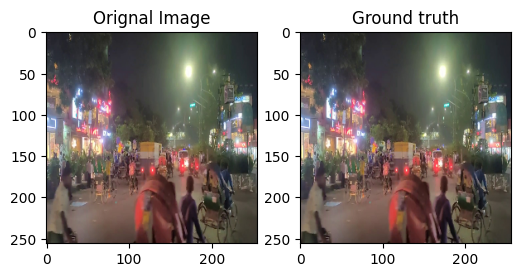

In [13]:
n=2
fig, ax = plt.subplots(1,2, figsize=(6,6))

# Img
ax[0].imshow(test_org_image[n])
ax[0].set_title("Orignal Image")

ax[1].imshow(test_org_image[n])
ax[1].set_title("Ground truth")

In [15]:
np.save(r'C:\Users\SHEHA\Downloads\GitHubRepository\Python2022\ComputerVision\asset\vid_image.npy', test_org_image)